## Webscraping with Python
### Social Sciences Datalab, 31. august 2021
#### Snorre Ralund, PhD, Data Steward
In the following exercises you will practice your scraping skills. 

This means:
1. Practice mapping websites / domains inspecting URL structure (folder and query syntax), html, and network activity. 
2. Navigating websites / domains via construction of URL. 
3. Constructing URL querys for APIs.
4. Practice Selenium interactions.
5. Starting your own project.

### Exercise 1: Backdoor API

* Click on the following link (https://coinmarketcap.com/currencies/bitcoin/#charts)
* open the **>Network Monitor<** of your browser (refresh the page) and figure which request is collecting the data behind the chart. 
* Collect the data using requests.
* Plot the "price_usd" data against time. Data comes as a nested dictionary. 
    * First you need to unpack this.
    * Each datapoint is a [unix timestamp](https://en.wikipedia.org/wiki/Unix_time) in miliseconds and a price. 
    * To plot against time in python, you need to convert it to a datetime object using the ``datetime`` module. 

``t = datetime.datetime.fromtimestamp(unixtime_in_seconds)``
* **Extra:** Figure out how to collect other coins (hint monitor the network activity at the frontpage of coinmarketcap.com)


In [ ]:
# solution goes here
import requests
link = ''
# download link
response = requests.get(link)
# unpack link using the '.json()' builtin to the response object

# unpack dictionary 

# extra: plot data using matplotlib

## Exercise 2: Parsing with BeautifulSoup
Here we practice extracting information from HTML using the BeautifulSoup library dedicated for this purpose.

We imagine that we are scraping the sales adds from dba.dk to monitor the private market for used cellphones.

Download the following add: https://www.dba.dk/iphone-12-pro-256-gb-guld/id-1082826851/ and extract title, prize, author and table of information. 
To circumwent their "scraping defense" we send some fake headers, pretending to be a browser (code provided below).

**Procedure**
- Parse the HTML tree with BeautifulSoup by applying 
```python
soup = BeautifulSoup(html)
```

- Right click on element of interest and click "Inspect"
- Locate a unique pattern (tag name and attribute) for the title, prize and author. 
- Search for the pattern using the builtin function.
```python
soup.find('div',attrs={'attribute_name':"attribute_value"}).text
```
- Do this for title, prize and author.
- Parse table using the ```pandas.read_html``` function.


In [ ]:
# import beautifulsoup.
import requests
from bs4 import BeautifulSoup
# pretend you are a normal browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'da,en-US;q=0.7,en;q=0.3',
    'Referer': 'https://www.dba.dk/soeg/?soeg=iphone',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Cache-Control': 'max-age=0',
}

html = requests.get('https://www.dba.dk/iphone-12-pro-256-gb-guld/id-1082826851/',headers=headers).text
soup = BeautifulSoup(html)

In [ ]:
# parse title 
tag_name = '' # eg 'div','span','h1'
attrs = {} # 'class':'TitleNode'
soup.find(tag_name,attr=attrs)

In [ ]:
# Use pandas to automatically parse table. .read_html(html)

## Exercise 3: Selenium as webbrowser
Use selenium to search google images
- Instantiate Browser.
- Visit https://images.google.com/
- Right click on the search input cell (and click on Inspect).
  - Right click on the html node of the input node and select Copy/"Copy css selector".
- Define a selected element  using the ```wd.find_element_by_css_selector()``` function to select the input cell. 
- Use the ```.send_keys()``` function to send a user defined query (e.g. 'banana').
- Select the the send request button (the magnifying glass icon), using the same method. 
- Scroll down the results using the following command: ```wd.execute_script("window.scrollTo(0, document.body.scrollHeight);") # scroll down to the bottom of the page```

- **Extra **: parse image links and download one of them. 





In [ ]:
# Set up Selenium for the Colab server.
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Selecting previously unselected package chromium-browser-l10n.
Preparing to unpack .../chromium-browser-l10n_92.0.4515.159-0ubuntu0.18.04.1_all.deb ...
Unpacking chromium-browser-l10n (92.0.4515.159-0ubuntu0.18.04.1) ...
Selecting previously unselected package chromium-chromedriver.
Preparing to unpack .../chromium-chromedriver_92.0.4515.159-0ubuntu0.18.04.1_amd64.deb ...
Unpacking chromium-chromedriver (92.0.4515.159-0ubuntu0.18.04.1) ...
Setting up chromium-codecs-ffmpeg-extra (92.0.4515.159-0ubuntu0.18.04.1) ...
Setting up chromium-browser (92.0.4515.159-0ubuntu0.18.04.1) ...
update-alternatives: using /usr/bin/chromium-browser to provide /usr/bin/x-www-browser (x-www-browser) in auto mode
update-alternatives: using /usr/bin/chromium-browser to provide /usr/bin/gnome-www-browser (gnome-www-browser) in auto mode
Setting up chromium-chromedriver (92.0.4515.159-0ubuntu0.18.04.1) ...
Setting up chromium-browser-l10n (92.0.4515.159-0ubuntu0.18.04.1) ...
Processing triggers for man-db (2.

In [ ]:
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  



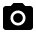
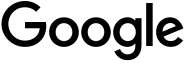

In [ ]:
import IPython 
wd.get('https://images.google.com/') # locate google images
IPython.display.HTML(wd.page_source)

In [2]:
# find element by css selector

In [1]:
#IPython.display.HTML(wd.page_source)

In [ ]:
# scroll down using the .execute_script() function

# Exercise 4: "Faking" your own API: New York Times search counts
## Mapping the domain
- Visit the New York Times website (They actually have there own API so it is a little bit of a )
- See if you can find there search interface.
- Play around with the queries to see how the URL changes.

## Scraping monthly counts of New York Times mentions of Feminism (or any other term)
- Construct a URL that limits the query to search only between august and september 2021. 
- Download the URL / Query.
- Parse the number of results, using the simple .split() built-in string function
- Construct queries changing the date range to every month from 2010 to 2021.
  - Here you can use the ```datetime ``` module and the ```datetime.timedelta()```/the ```dateutil.relativedelta``` function to iterate. Or scroll to the bottom for helper functions.
- Download the queries while extracting the number of results using the builtin ```.split() ``` function of strings. 
- Convert to integer and plot the results as a time series.
  - ```matplotplotlib.pyplot.plot()```






In [ ]:
### HGELPER FUNCTION ### 
def format_date(t):
    date = t.date()
    year,month,day = date.year,date.month,date.day
    if month<10:
        month = '0%d'%month
    else:
        month =str(month)
    if day<10:
        day = '0%d'%day
    else:
        day = str(day)
    return '%d%s%s'%(year,month,day)
import datetime
from dateutil.relativedelta import relativedelta
today + relativedelta(months=6)
today = datetime.datetime.now()
n_months = 12*10
dates = [today-relativedelta(months=i) for i in range(0,n_months)]
format_dates = [format_date(date) for date in dates]


In [ ]:
# make query using the dates as start and end

# def parse function taking html as input

In [ ]:
# run through all queries and parse number of hits.  

100%|██████████| 119/119 [00:13<00:00,  9.01it/s] 


In [ ]:
# plot hits over time

## Kickstart your own project (with counselling from the Datalab)
- Find a website with interesting information.
- Figure out a way to map the domain.
  - Look for url pattern, look for /archive or /search to locate easy listings. 
- Collect listings and extract links to endnode (the page with the information of interest)
- Download all pages (keep a log using the connector class)
- Parse the html to produce final dataset.
   - Iterative for quality control.

### API version
- Register as developer to collect api key.
- Read the docs to figure out query construction and pagination scheme.
- Download query results.
- Unpack to produce final dataframe.
 